### AdaBoost Implementation in sci-kit learn

Here I'll be implementing AdaBoost. It's a boosting algorithm that iteratively adjusts the weights of training samples based on classification errors.

Misclassified samples have higher weights, which increases their influence in subsequent iterations. Correctly classified samples receive lower weights. This process can help the model focus 


A random forest is also used here, and i used bagging in it with a random feature selection. It builds multiple decision trees using bootstrapped samples of the dataset. At each split, it selects a random subset of features.

In [17]:
#import libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [5]:
iris = datasets.load_iris()


#set the target variables and training columns
X = iris.data
y = iris.target

print(type(X))
print(type(y))

print(X.shape)
print(y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
#split using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)


#normalize the features and create a base stump as the estimator
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
#train the decision tree classifier model using the training data
base_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
#predict using the trained model to make predictions on test data
predictions = base_estimator.predict(X_test)

In [10]:
#calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy, {accuracy:.4f}")

Model Accuracy, 0.9667


In [11]:
#Now, let's create and train the AdaBoost classifier and compare it to the decision tree
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=55, random_state=42)

In [12]:
#train the adaboost classifier
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   n_estimators=55, random_state=42)

In [15]:
#do predictions on normalized data
ada_predictions = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, predictions)
#print metrics
print(f"AdaBoost Model Accuracy: {ada_accuracy:.4f}")

AdaBoost Model Accuracy: 0.9667


In [18]:
#now let's perform boostraping for the random forest classifier.
rf_clf = RandomForestClassifier(n_estimators=60, max_depth=2, random_state=101, bootstrap=True, max_features=5)

#train the clf
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=5, n_estimators=60,
                       random_state=101)

In [19]:
clf_predictions = rf_clf.predict(X_test)

In [21]:
#calculate metrics on clf
clf_accuracy = accuracy_score(y_test, clf_predictions)
print(f"Model's Accuracy: {clf_accuracy:.4f}")

Model's Accuracy: 0.9667


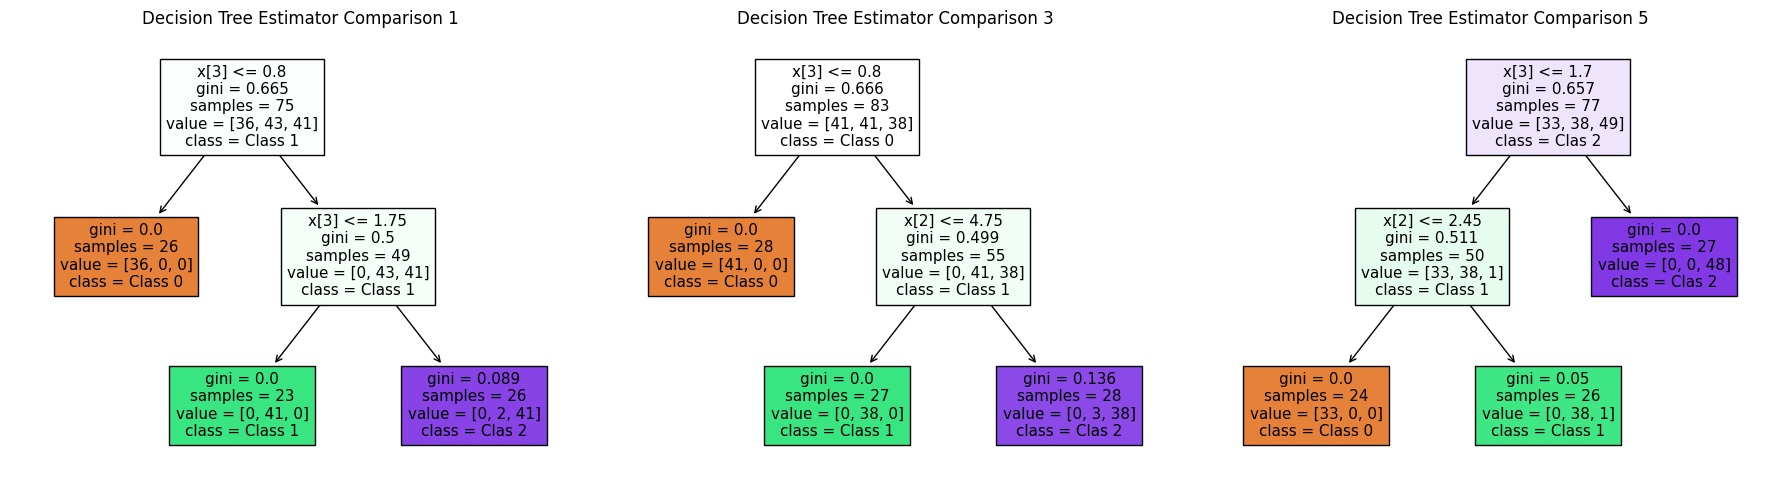

In [22]:
# Visualizing specific estimators (1st, 3rd, 5th)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, idx in enumerate([0, 2, 4]):  # Estimators are 0-indexed
    plot_tree(
        rf_clf.estimators_[idx], 
        feature_names=X_train.columns if hasattr(X_train, 'columns') else None,  
        class_names=['Class 0', 'Class 1', 'Clas 2'], 
        filled=True, 
        ax=axes[i]
    )
    axes[i].set_title(f"Decision Tree Estimator Comparison {idx + 1}")

plt.tight_layout()
plt.show()